# Keep After Spread Slippage Percent (every fill pays bid/ask slippage)

Used in C2Score twice:

`- (
%[Keep After Spread Slippage Percent (every fill pays bid/ask slippage)]% > 1 ? 0 :	((1 -  %[Keep After Spread Slippage Percent (every fill pays bid/ask slippage)]% ) * 3000)
  )
`

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7689      250245  -6493.2500      0.9800      1.0000      0.9940      1.0000   5324.5300     21.0974 


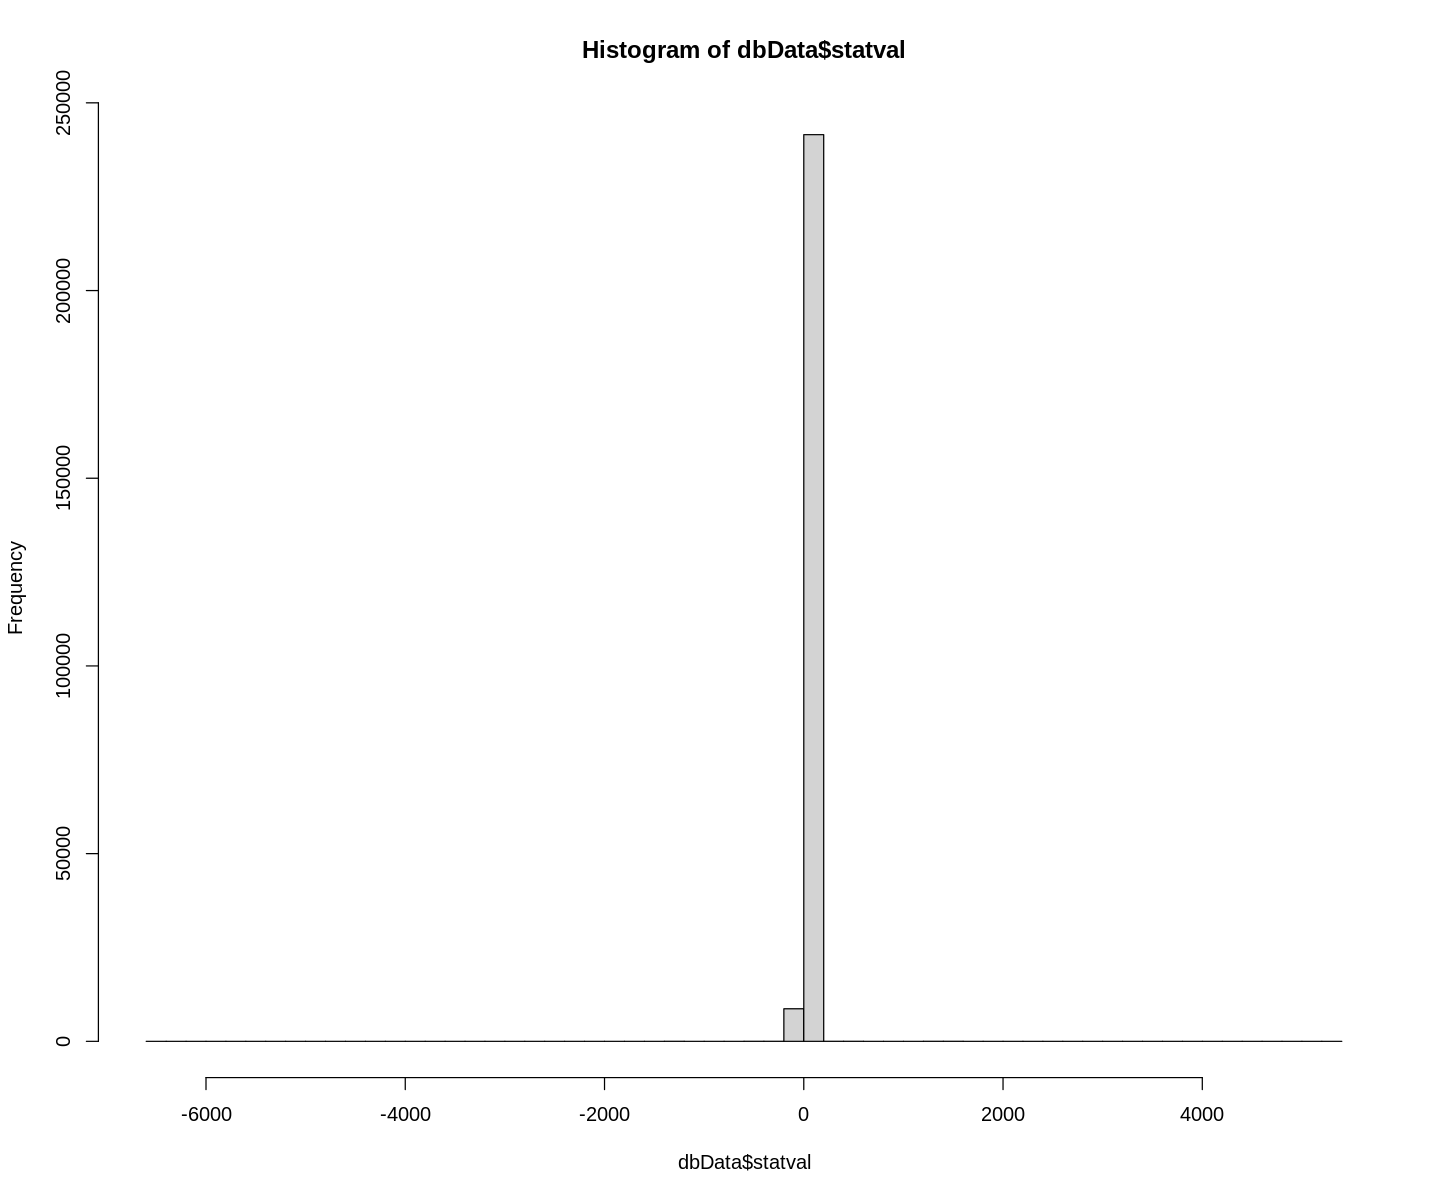

In [2]:
# What data we have.
sql = "select systemid, YYYYMMDD, statval
            from historical_stats_modern h
            where statname='keepAfterSlip'"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7137      209833     -0.9900      0.9700      1.0000      0.9191      1.0000      1.0000      0.2338 


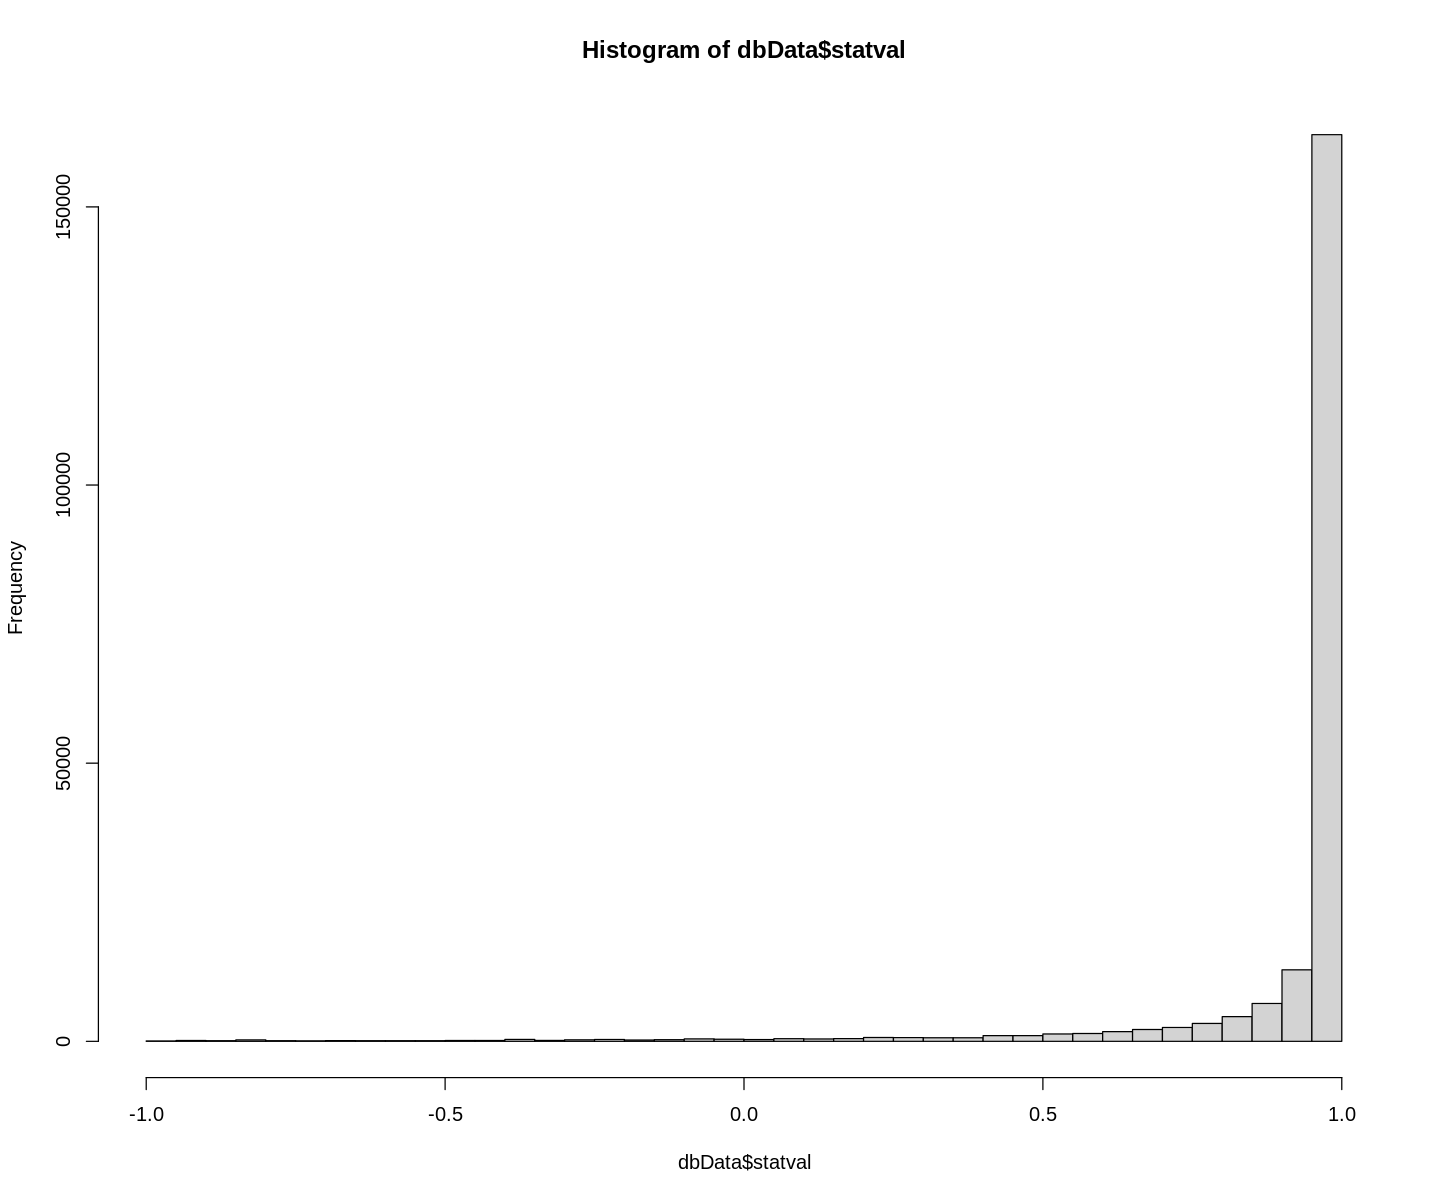

In [3]:
# Let's look around zero

sql = "select statval, systemid
            from historical_stats_modern h
            where statname='keepAfterSlip' and statval > -1 and statval <= 1"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7051      205798  -2970.0000    -90.0000      0.0000   -166.5526      0.0000      0.0000    430.3632 


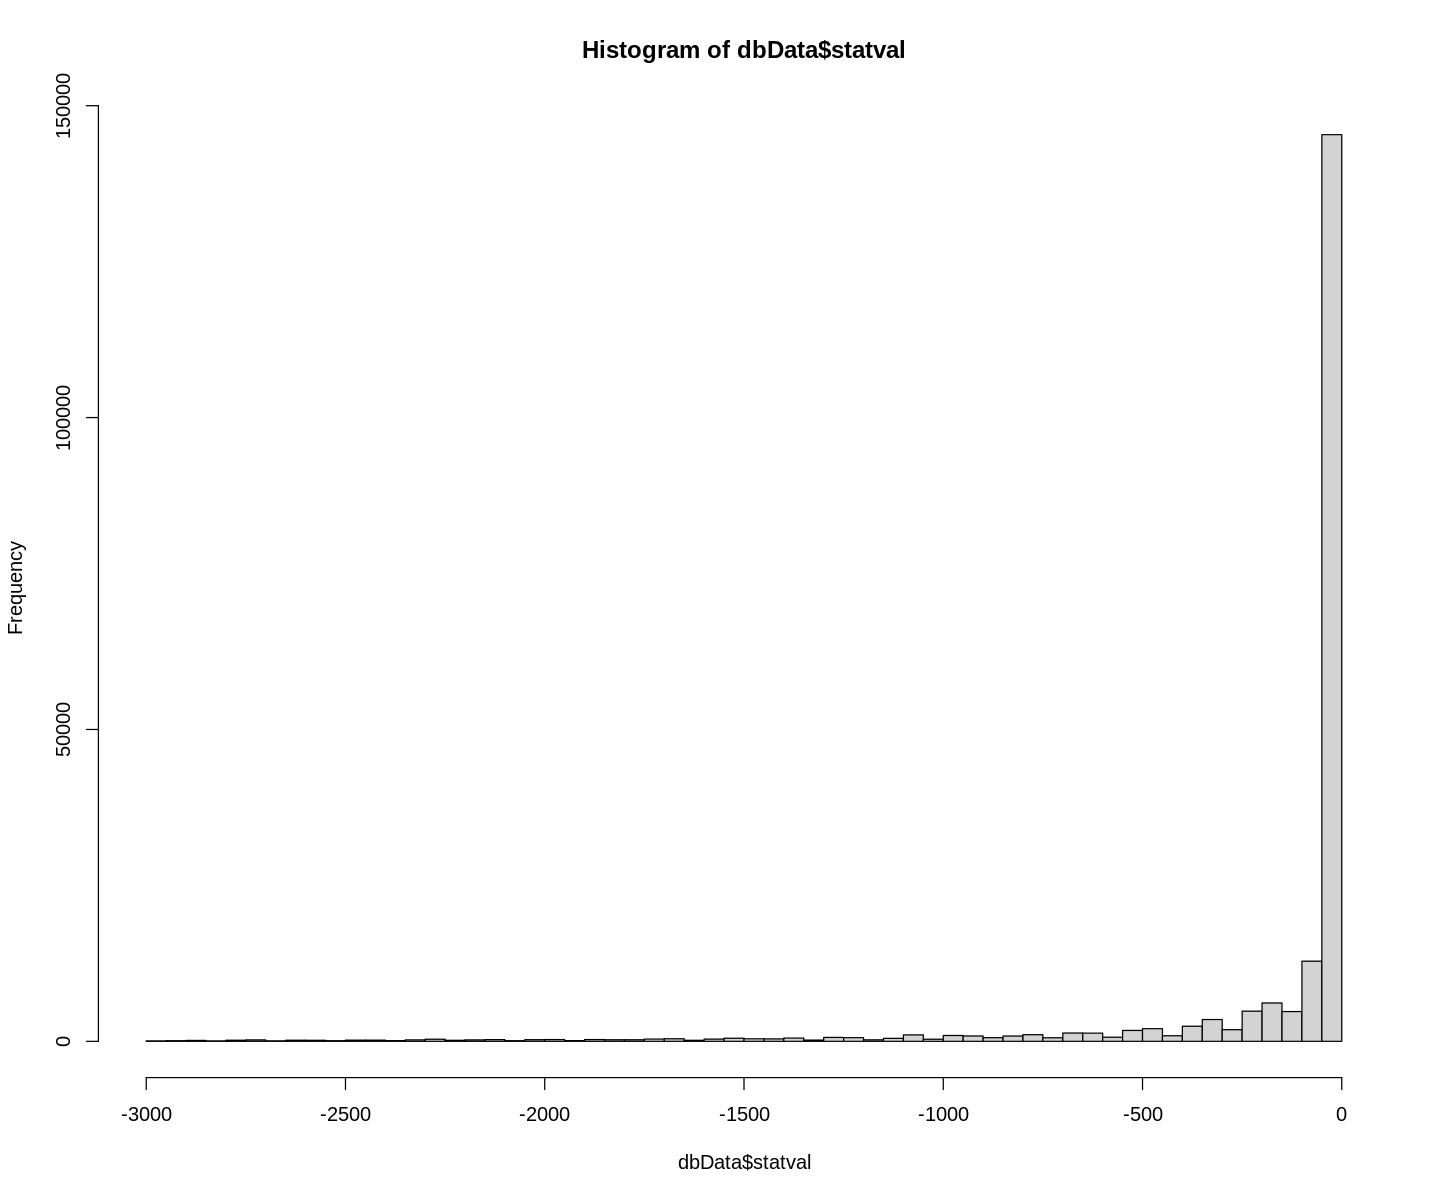

In [4]:
# C2Score wants less or equal to 1 and uses -( (1 - statval ) * 3000)  which is a negative number.

sql = "select  (statval - 1 ) * 3000 as statval, systemid
            from historical_stats_modern h
            where statname='keepAfterSlip' and statval > 0 and statval <= 1"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1700       56607    -90.0000      0.0000      0.0000     -9.6174      0.0000      0.0000     22.1240 


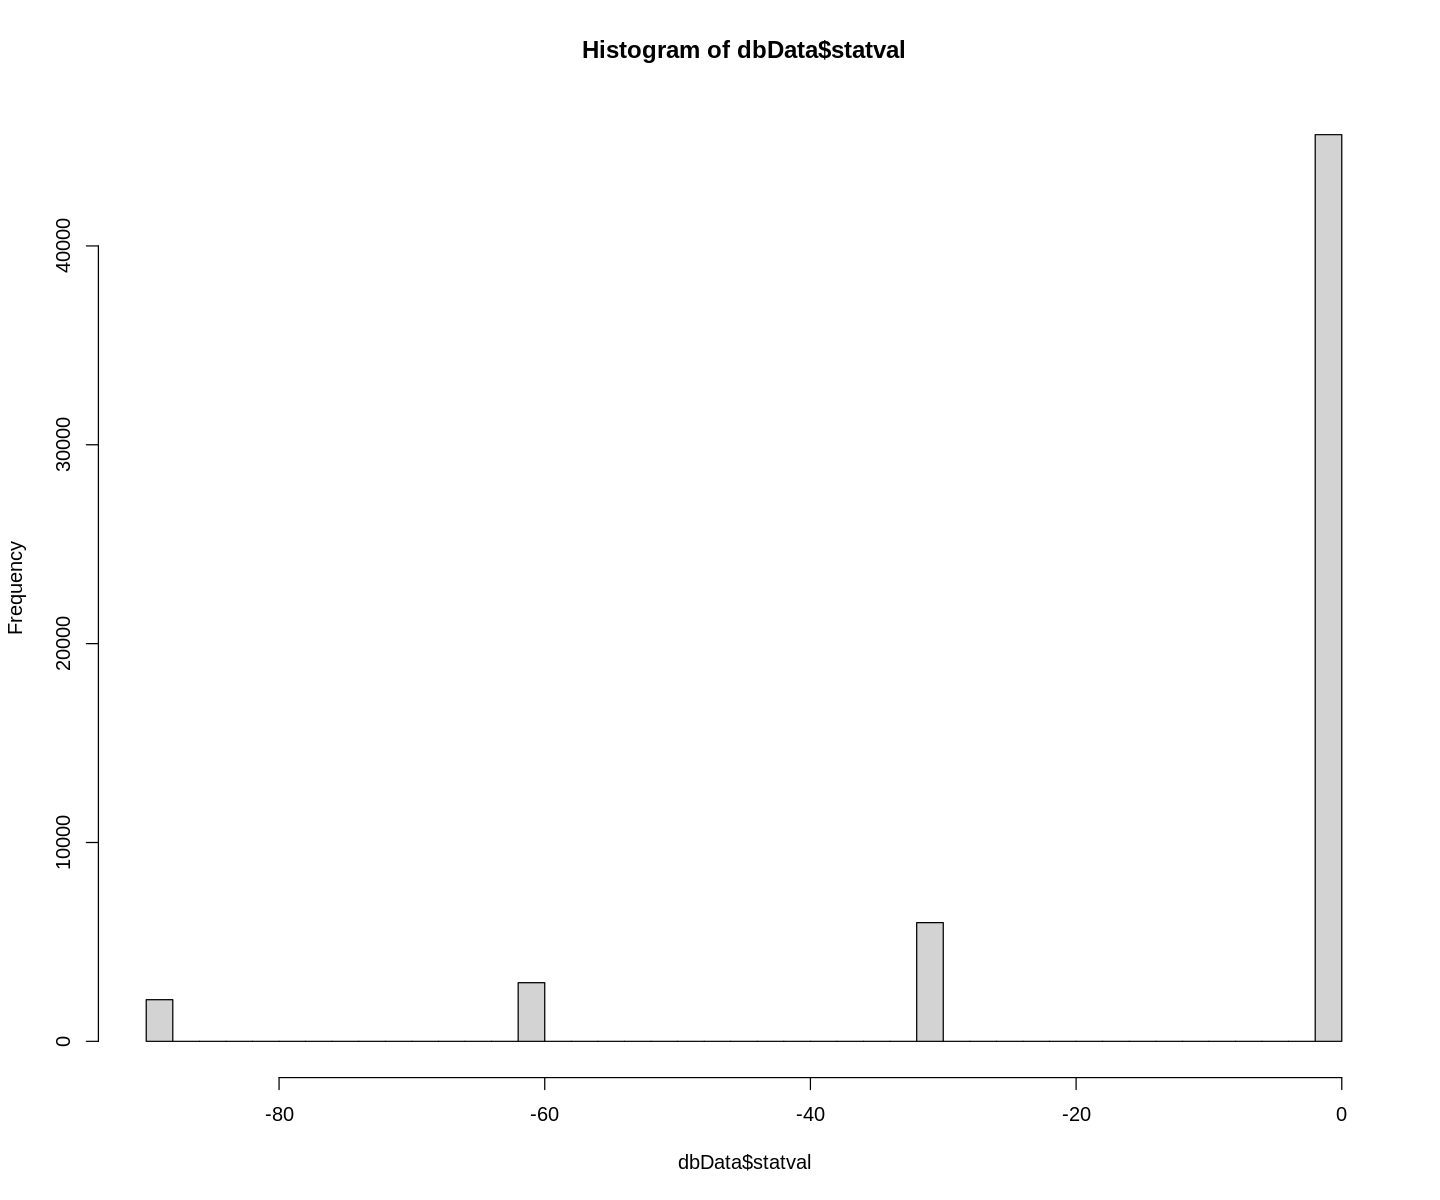

In [5]:
# It is too wide range for investigation. Lets get just data from -100 to zero.
# Join with our cleaned data
sql = "select (statval - 1 ) * 3000 as statval, eq.*
       from ReturnsDataInIntervalsCleanedSkip090 eq
       join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
       where statname='keepAfterSlip' and statval >= 0.97 and statval <= 1"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1700       56607    -90.0000      0.0000      0.0000     -9.6174      0.0000      0.0000     22.1240 



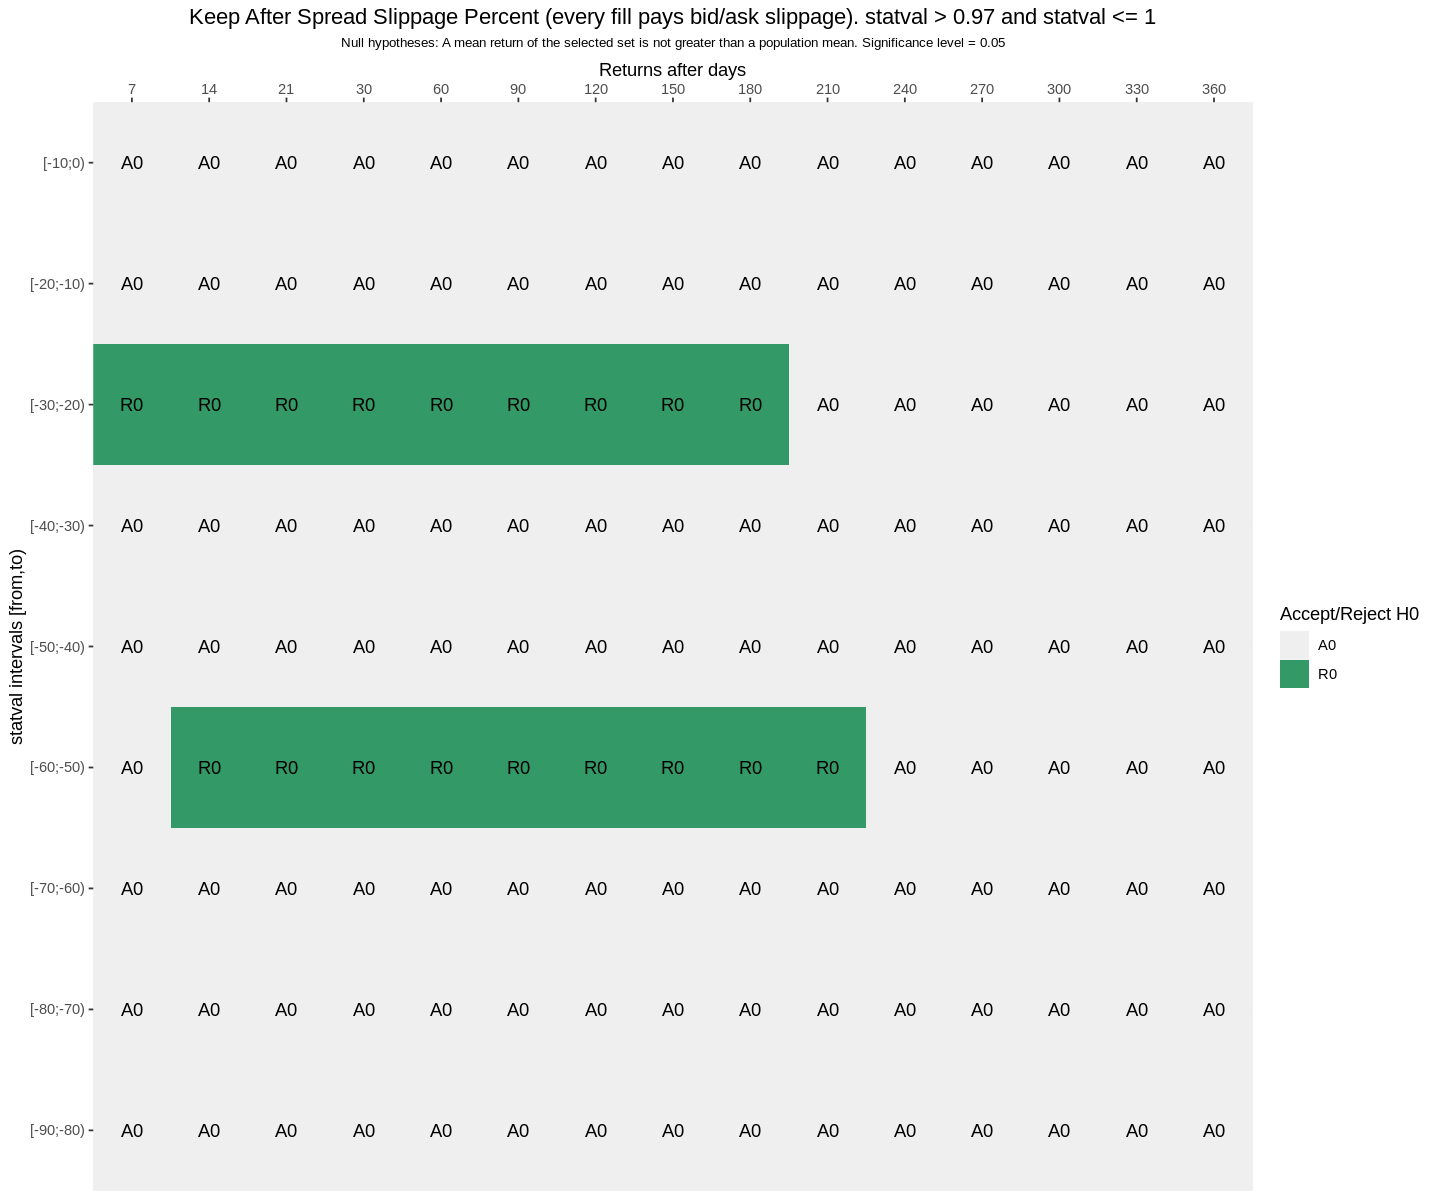

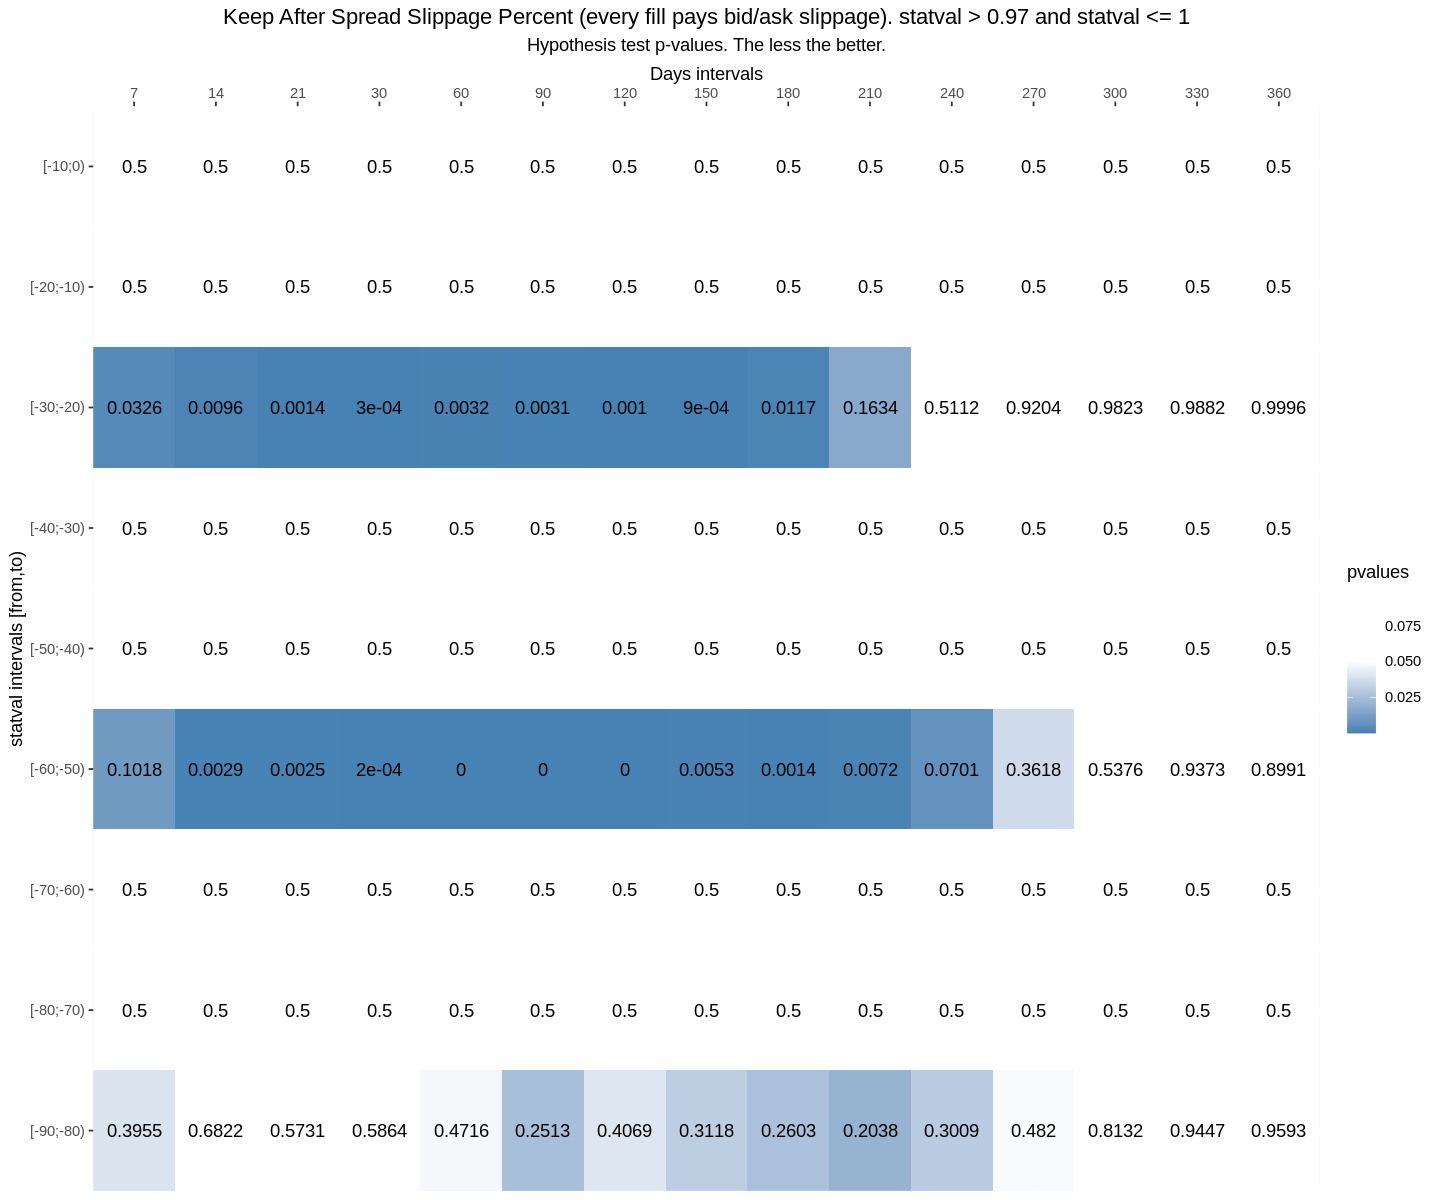

In [6]:
experiment = list(
  name = "Keep After Spread Slippage Percent (every fill pays bid/ask slippage)",
  description = "Keep After Spread Slippage Percent (every fill pays bid/ask slippage). statval > 0.97 and statval <= 1",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = -90, to = 0, by = 10))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


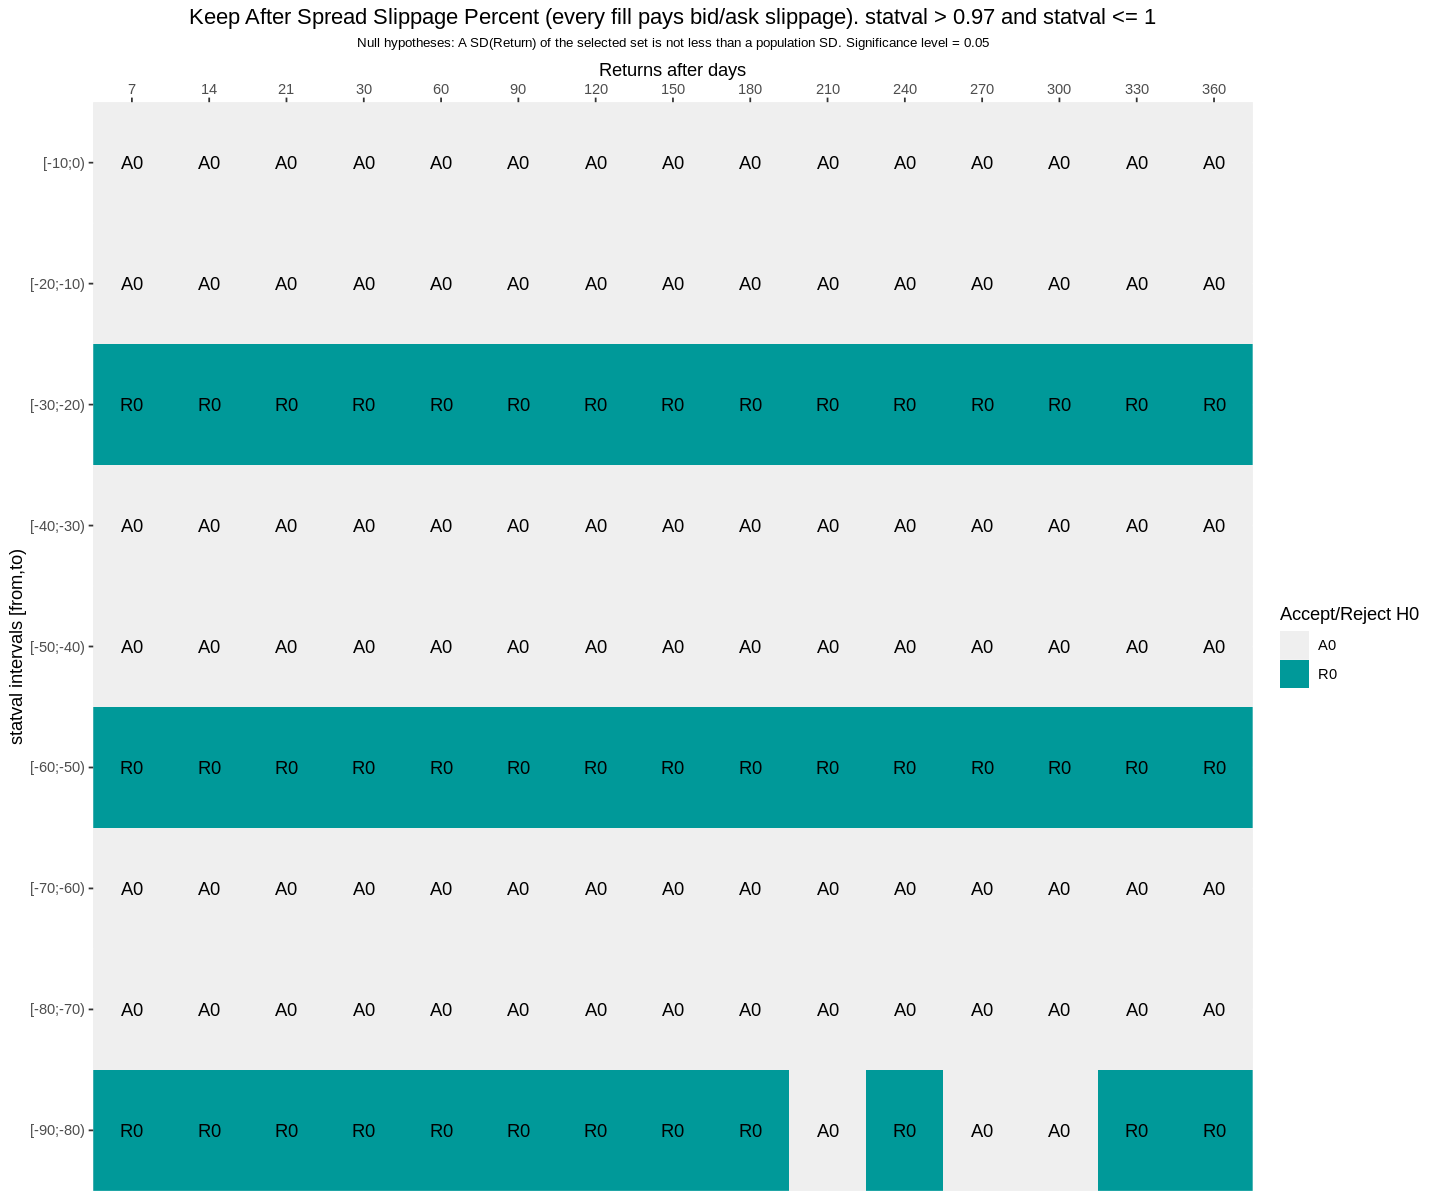

In [7]:
showSDLessHypothesisTest(experiment, result)

In [8]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-10 <= statval < 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-20 <= statval < -10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-30 <= statval < -20,5855,5745,5624,5493,4985,4486,4078,3696,3319,3016,2760,2497,2273,2088,1924
-40 <= statval < -30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-50 <= statval < -40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-60 <= statval < -50,2899,2848,2794,2710,2461,2256,2036,1852,1676,1562,1437,1319,1224,1116,1034
-70 <= statval < -60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-80 <= statval < -70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-90 <= statval < -80,2059,2022,1986,1929,1719,1549,1391,1244,1108,1014,921,825,743,670,595



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



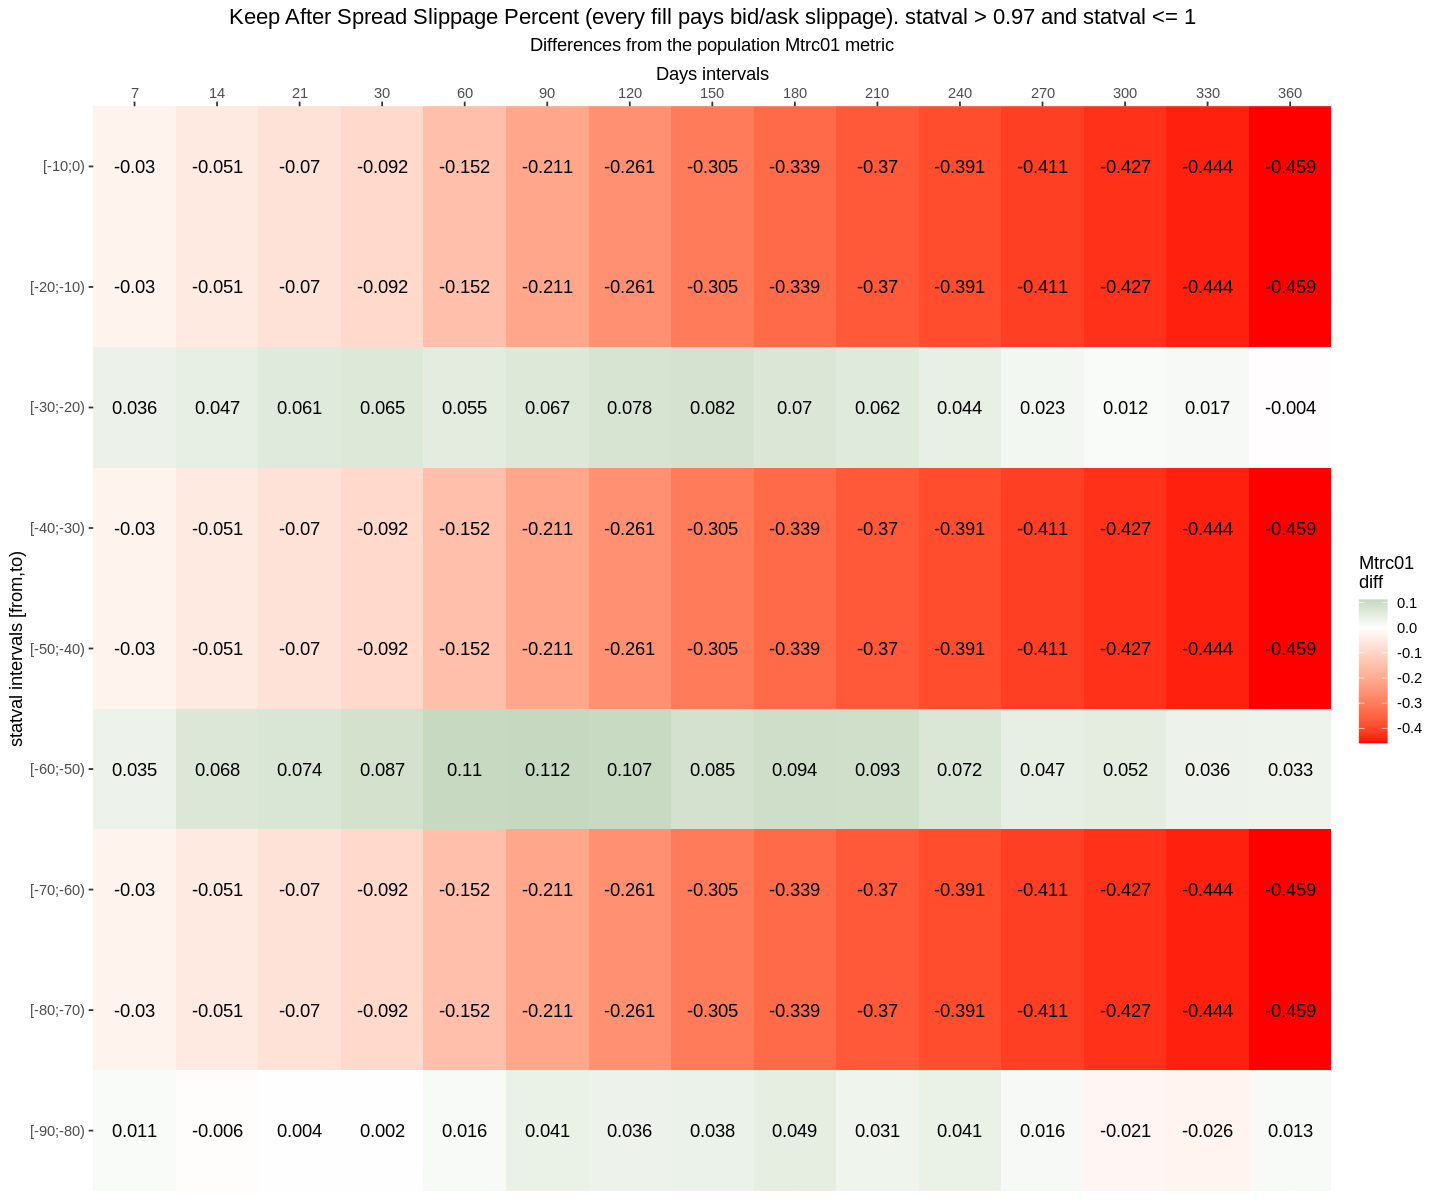

In [9]:
showMetricDifferences(experiment, result)

In [10]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-10 <= statval < 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-20 <= statval < -10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-30 <= statval < -20,440,438,432,421,374,321,280,248,216,194,177,159,143,131,121
-40 <= statval < -30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-50 <= statval < -40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-60 <= statval < -50,383,377,376,357,314,285,245,217,183,170,154,140,129,106,96
-70 <= statval < -60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-80 <= statval < -70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-90 <= statval < -80,354,350,347,338,299,262,220,190,164,147,136,123,114,103,85


### Discussion

I am not sure if it makes sense.